In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

# Convolution Neural Network 

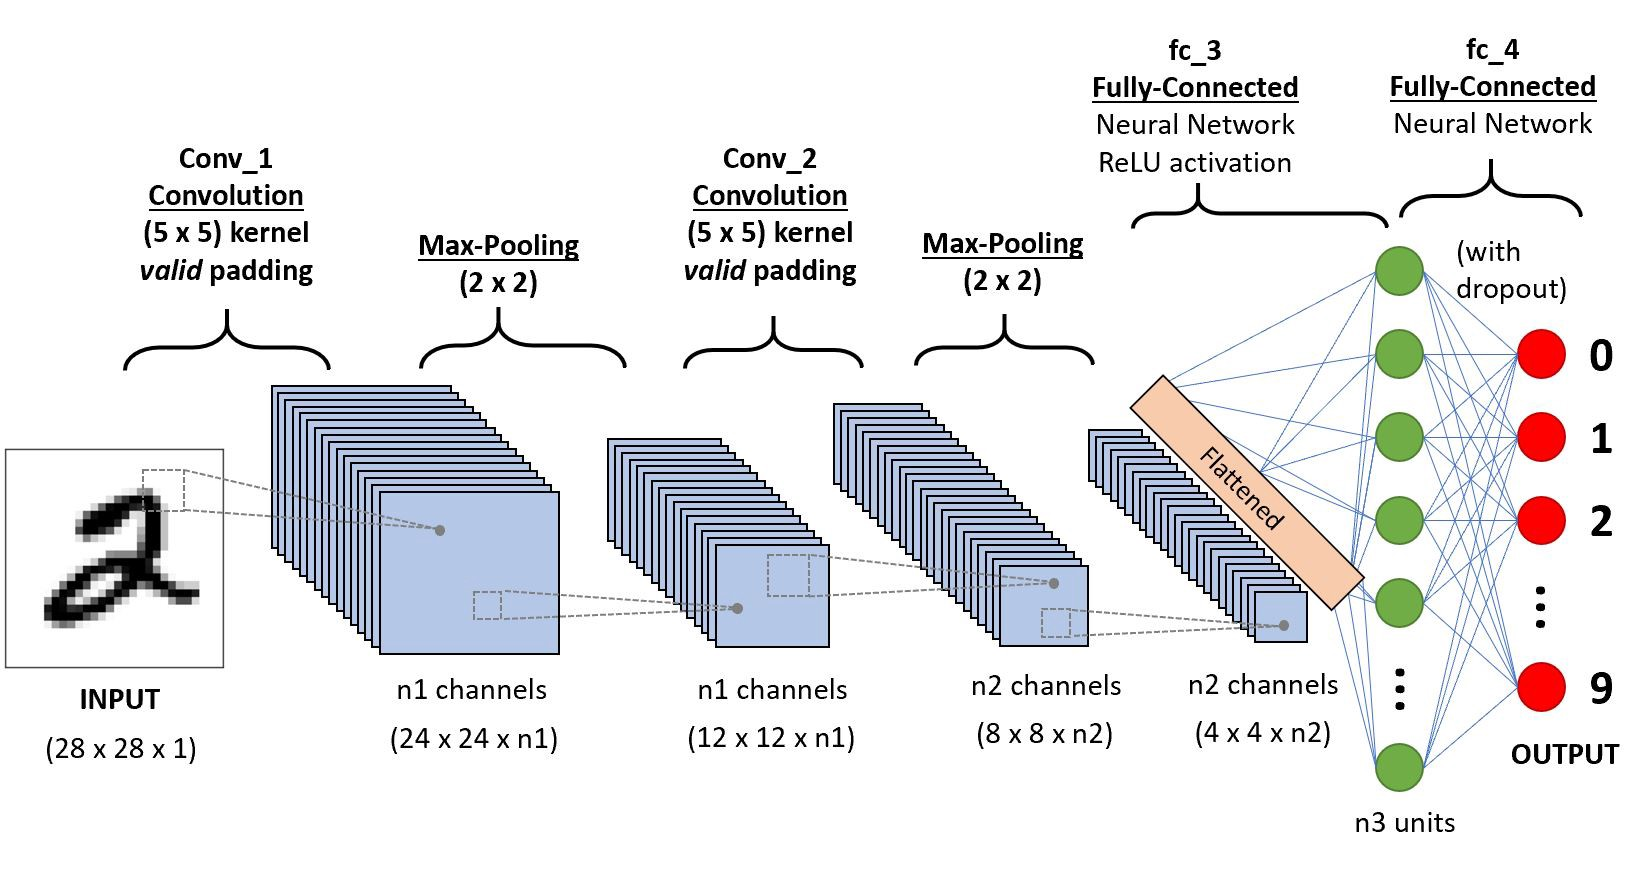

# History of LeNet5

LeNet is a convolutional neural network structure proposed by Yann LeCun et al. in 1998. In general, LeNet refers to lenet-5 and is a simple convolutional neural network. Convolutional neural networks are a kind of feed-forward neural network whose artificial neurons can respond to a part of the surrounding cells in the coverage range and perform well in large-scale image processing.

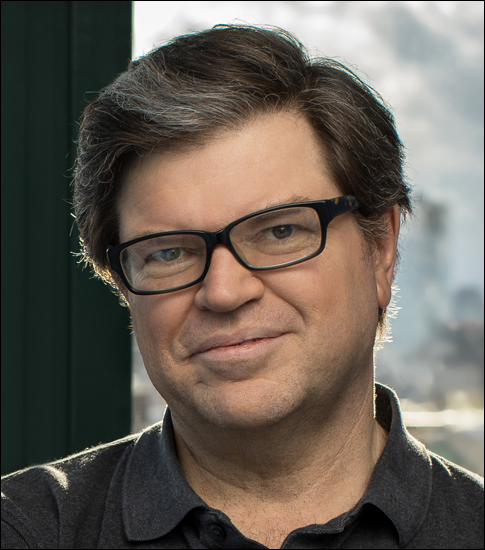

# Convolution Operation

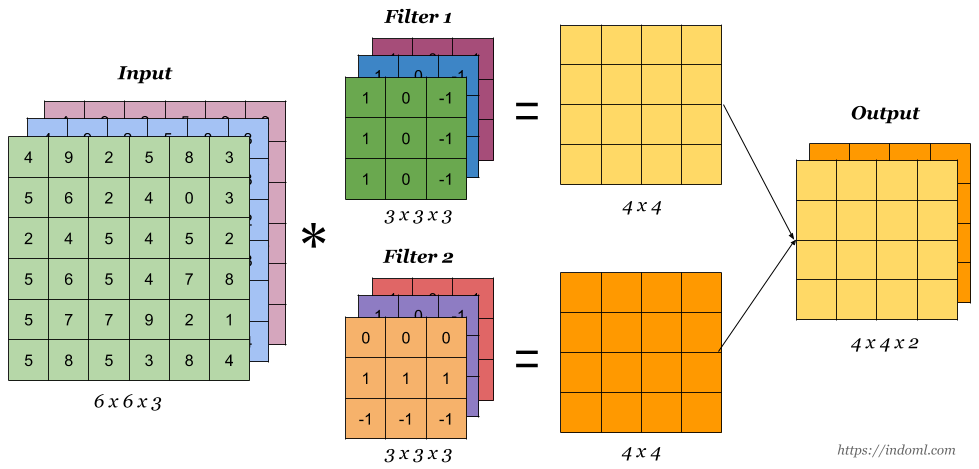

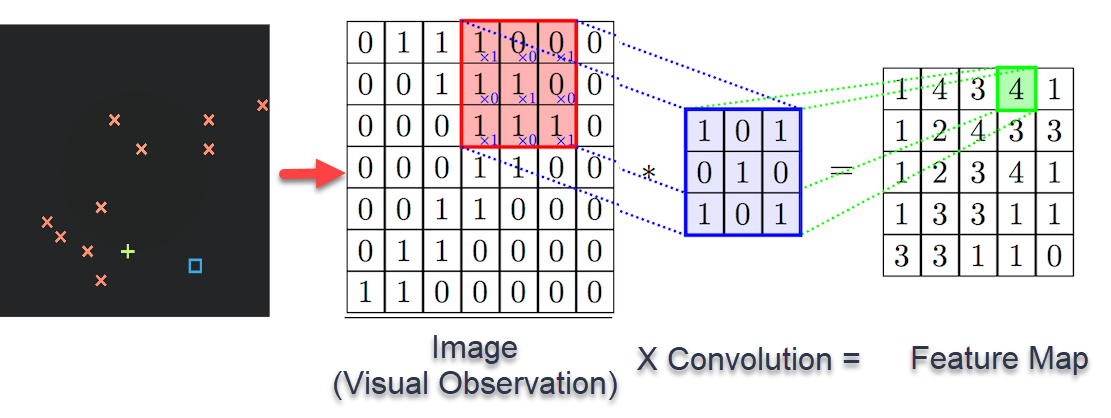

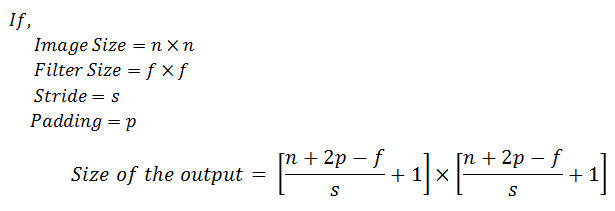

# ResNet has changed the world ! 

A residual neural network (ResNet) is an artificial neural network (ANN) of a kind that builds on constructs known from pyramidal cells in the cerebral cortex. Residual neural networks do this by utilizing skip connections, or shortcuts to jump over some layers. Typical ResNet models are implemented with double- or triple- layer skips that contain nonlinearities (ReLU) and batch normalization in between.[1][2] An additional weight matrix may be used to learn the skip weights; these models are known as HighwayNets.[3] Models with several parallel skips are referred to as DenseNets.[4][5] In the context of residual neural networks, a non-residual network may be described as a plain network.

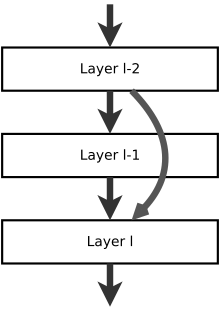

## More detail 
- https://towardsdatascience.com/build-your-own-convolution-neural-network-in-5-mins-4217c2cf964f
- https://towardsdatascience.com/deep-learning-using-transfer-learning-python-code-for-resnet50-8acdfb3a2d38

# Mnist Dataset

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

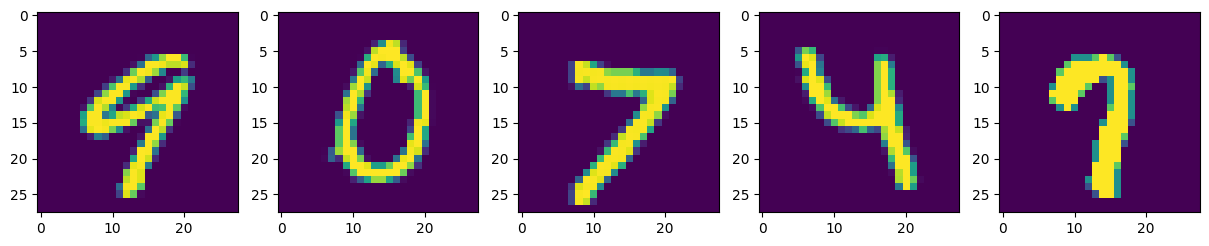

In [10]:
# visualize training data 
random_index = np.random.randint(0,60000,5)
fig , ax = plt.subplots(1,5,figsize=(15,6))
for i in range(5) : 
    ax[i].imshow(x_train[random_index[i]])

In [11]:
# change input size of input 
x_train = tf.expand_dims(x_train,-1)
x_test = tf.expand_dims(x_test,-1)
print(x_train.shape , x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [12]:
tf.keras.backend.clear_session()

In [13]:
# model 
model  = tf.keras.Sequential([tf.keras.layers.Conv2D(filters=32 , kernel_size=(2,2) , input_shape=(28, 28, 1)),
                             tf.keras.layers.MaxPool2D(pool_size=(2,2)) , 
                             tf.keras.layers.Flatten() , 
                             tf.keras.layers.Dense(16,activation='relu') , 
                             tf.keras.layers.Dense(10,activation='softmax')])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 32)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 16)                86544     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
Total params: 86,874
Trainable params: 86,874
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [15]:
# test model performace before training 
print(model.evaluate(x_test,y_test,verbose=0)[1])

0.15610000491142273


In [16]:
# training model 
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1044 - acc: 0.2009 - val_loss: 1.9881 - val_acc: 0.2415
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6446 - acc: 0.3616 - val_loss: 1.2010 - val_acc: 0.5903
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8681 - acc: 0.7128 - val_loss: 0.5902 - val_acc: 0.8317
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5227 - acc: 0.8429 - val_loss: 0.4288 - val_acc: 0.8831
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4264 - acc: 0.8777 - val_loss: 0.3775 - val_acc: 0.8972
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3834 - acc: 0.8904 - val_loss: 0.3392 - val_acc: 0.9077
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3327 - acc: 0.9035 - val_loss: 0.2969 - val_acc: 0.9202
Epoch 8/10
1875/1875 [==============================] - 6s 3ms

In [17]:
# test model performace after training 
print(model.evaluate(x_test,y_test,verbose=0)[1])

0.9366000294685364


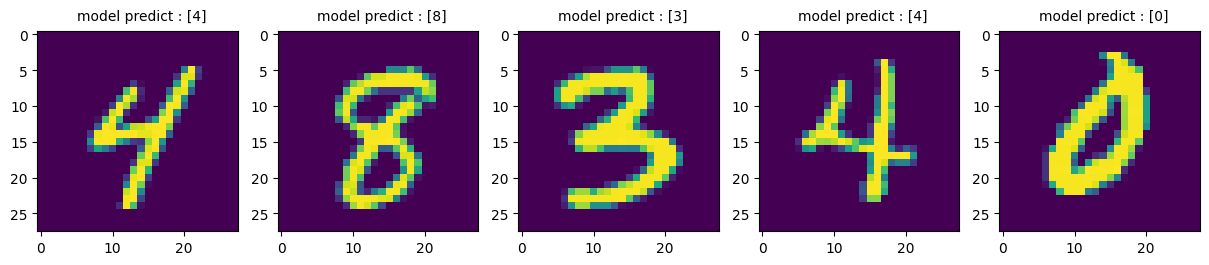

In [18]:
# test your model 
random_index = np.random.randint(0,10000,5)
fig , ax = plt.subplots(1,5,figsize=(15,6))
for i in range(5) : 
    img = x_test[random_index[i]]
    ax[i].imshow(np.squeeze(img))
    ax[i].text(5,-2,f'model predict : {np.argmax(model.predict(tf.expand_dims(img,0)) , axis=-1)}')

## Test with your own images

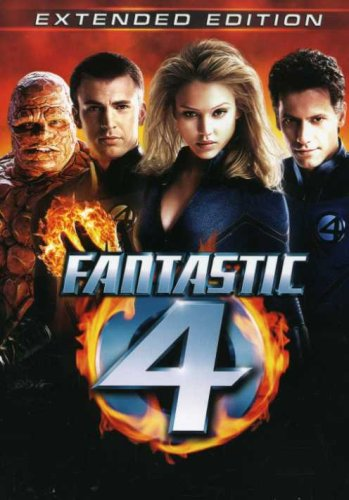

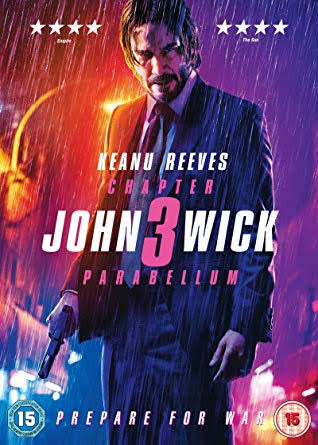

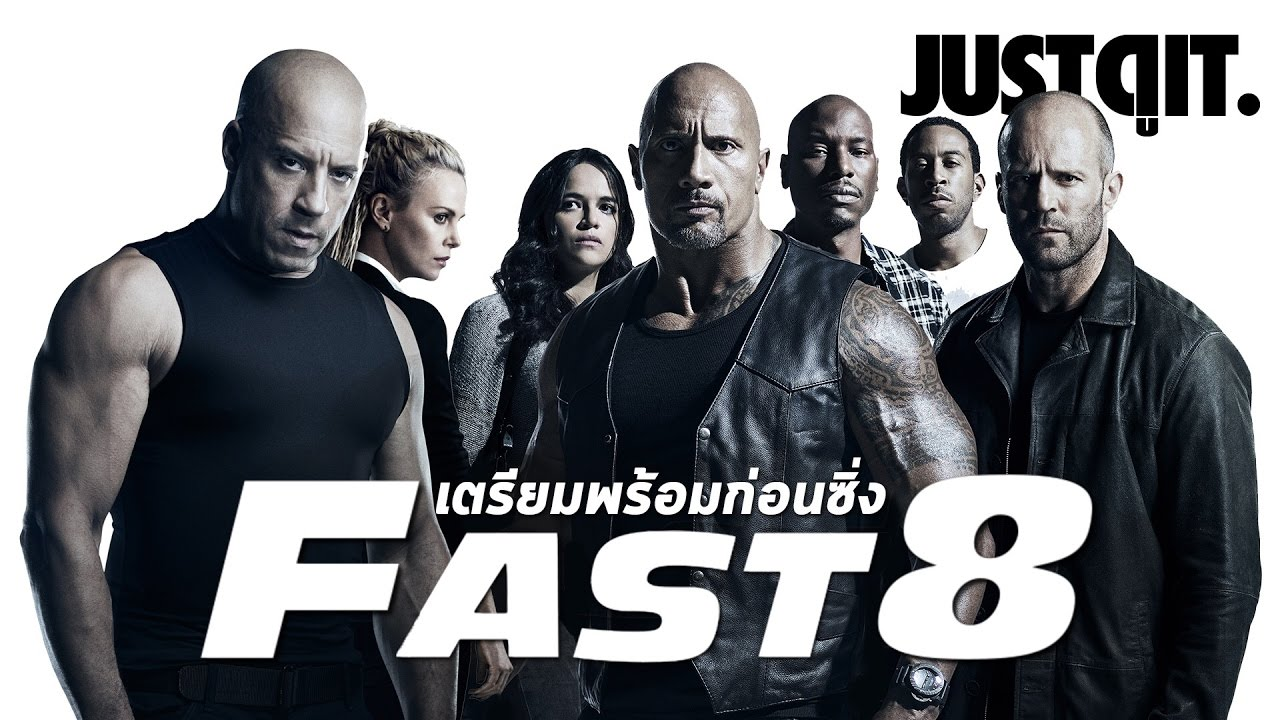

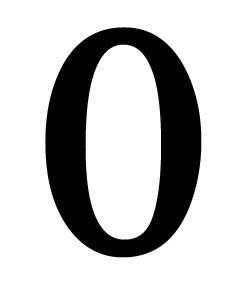

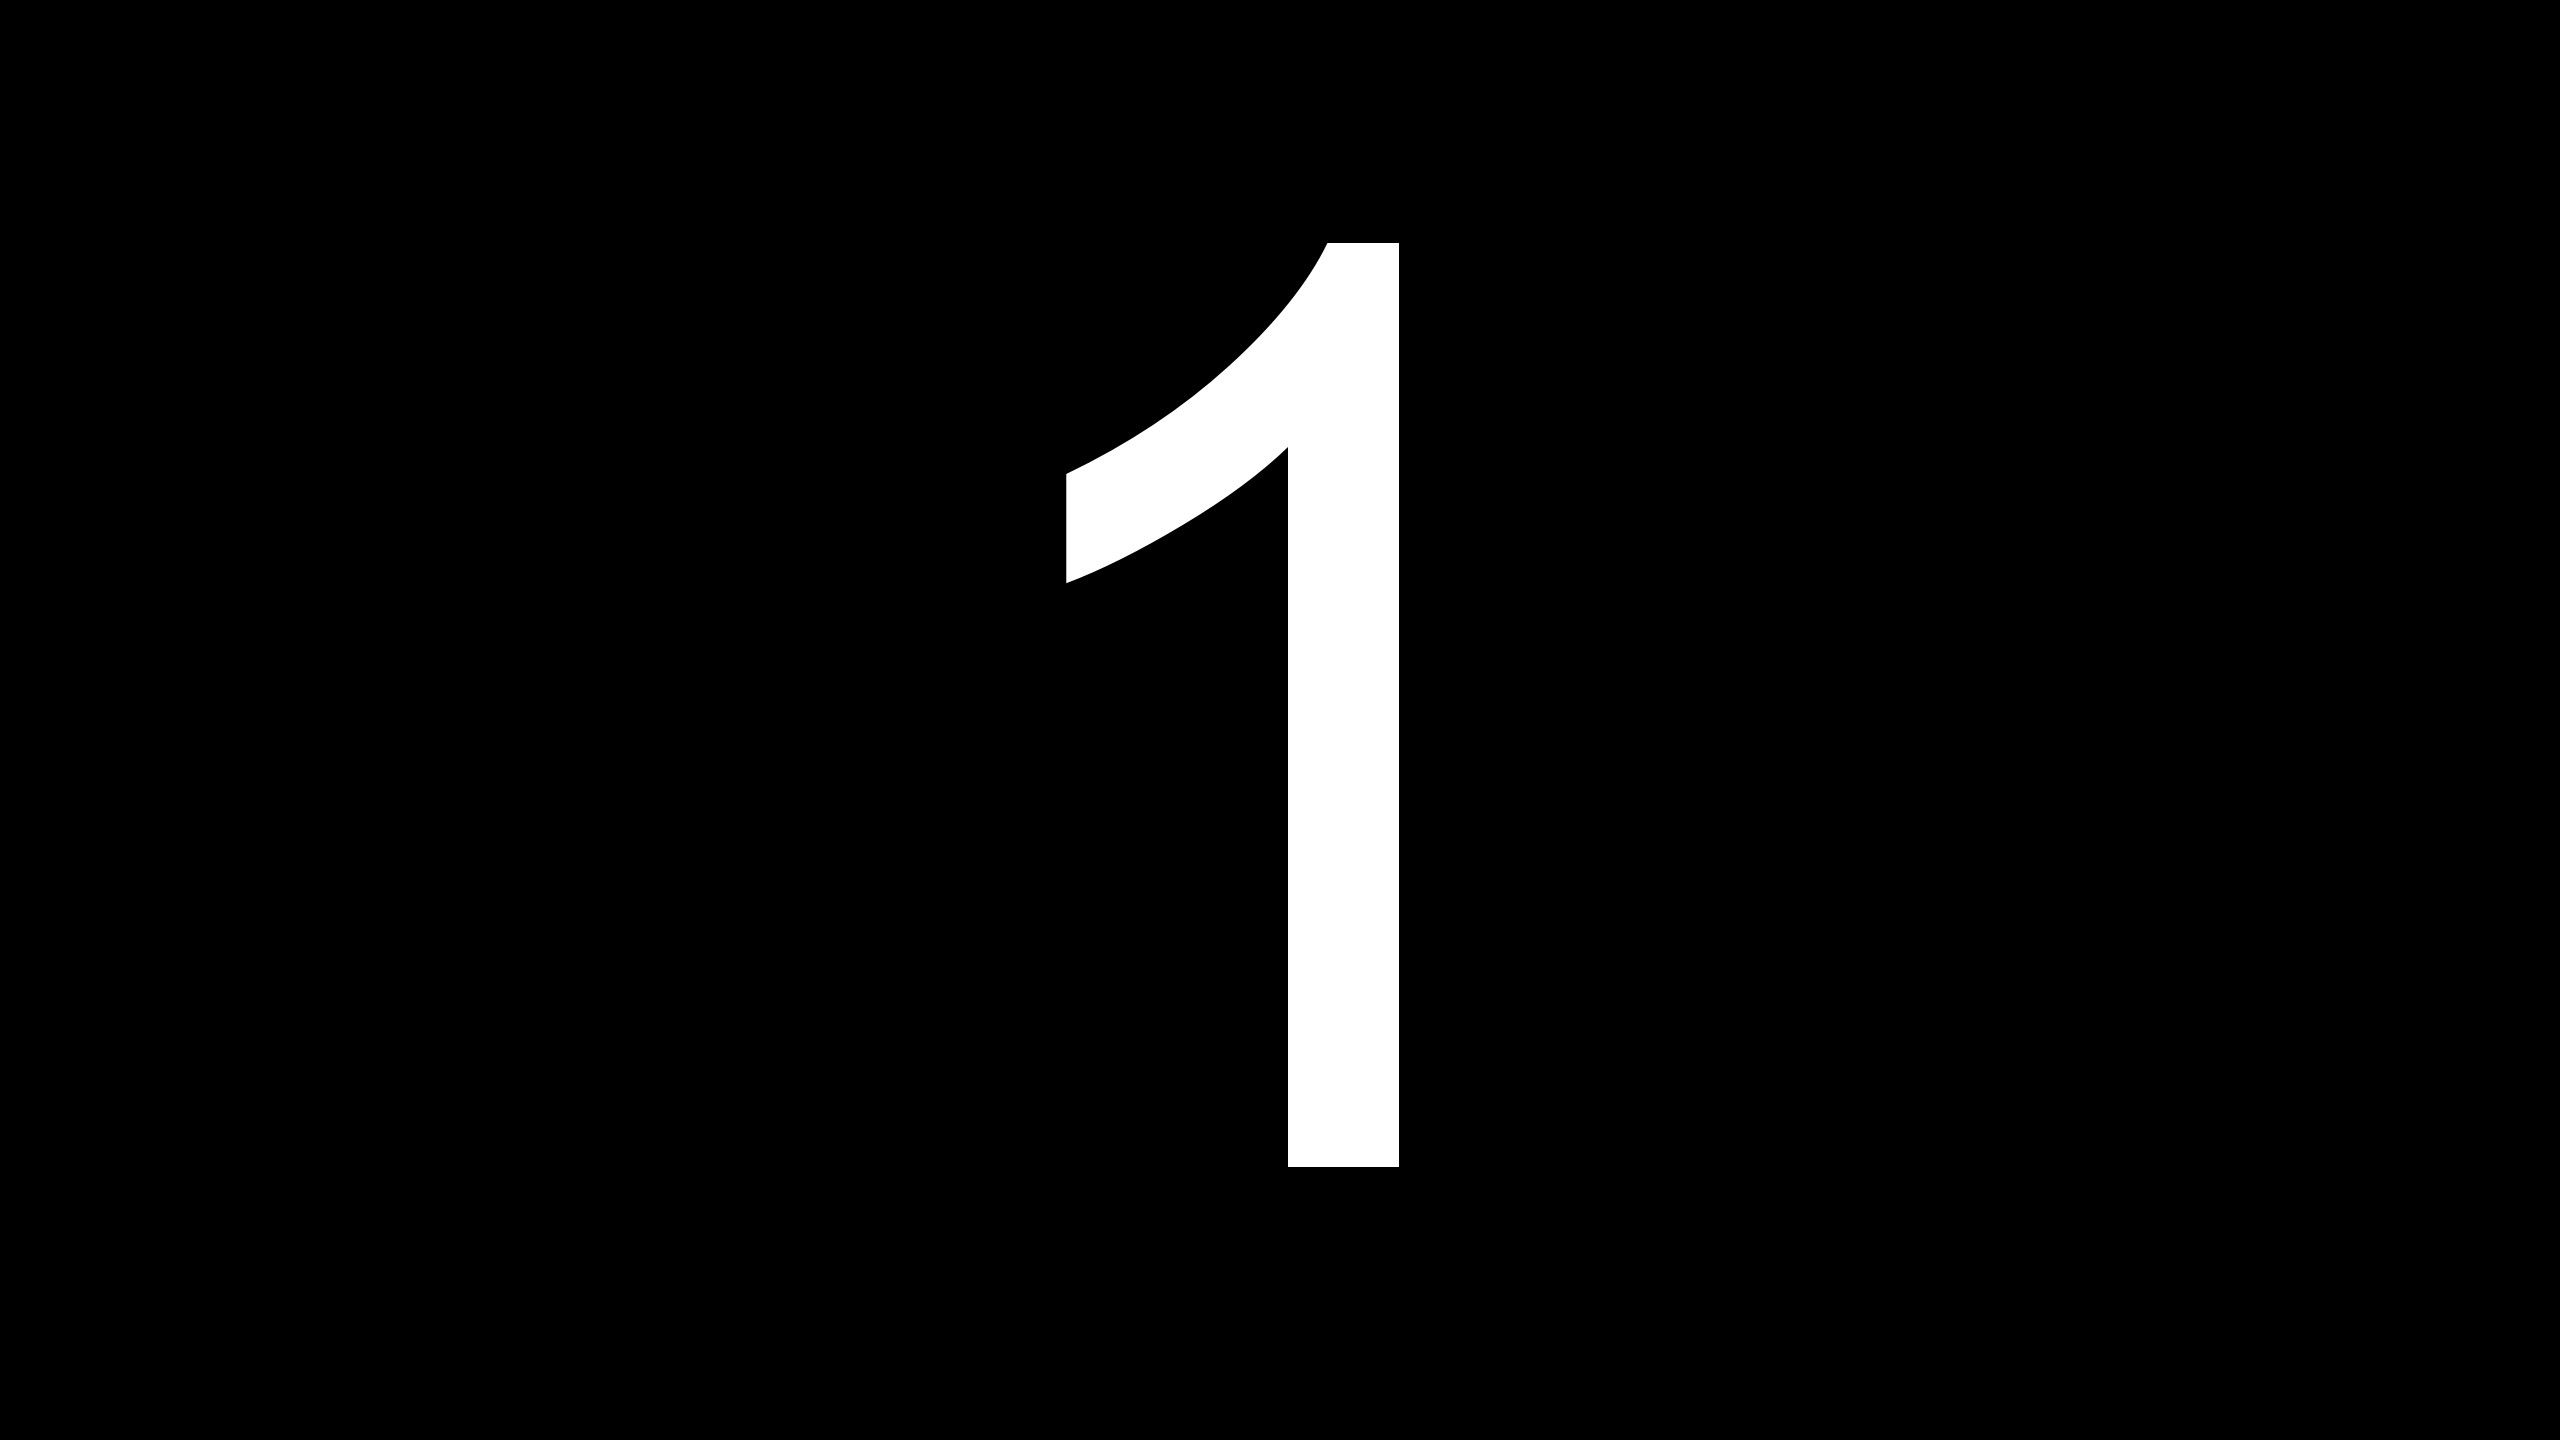

In [65]:
# test_img = plt.imread('4test.jpg')
# plt.imshow(test_img)

In [66]:
# # preprocess input 
# print(f'Original img shape :{test_img.shape} ')

In [67]:
from tensorflow.keras.preprocessing.image import load_img , img_to_array

In [68]:
def predict_your_image(path) : 
    test_img = load_img(path,target_size=(28,28),color_mode='grayscale')
    array_test_img = img_to_array(test_img)
    plt.imshow(np.squeeze(array_test_img))
    plt.title(f'model predict : {np.argmax(model.predict(tf.expand_dims(array_test_img,0)) , axis=-1)}')

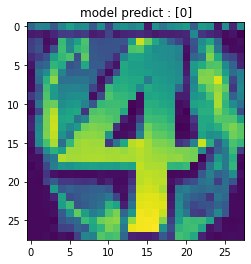

In [69]:
predict_your_image('4test.jpg')

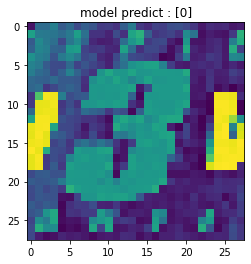

In [70]:
predict_your_image('3test.jpg')

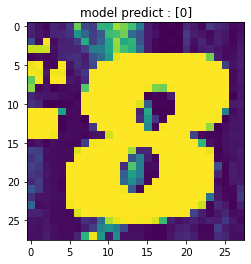

In [71]:
predict_your_image('8test.jpg')

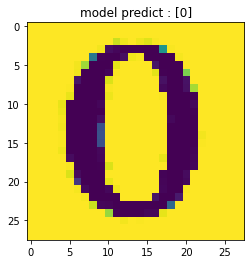

In [72]:
predict_your_image('0test.jpg')

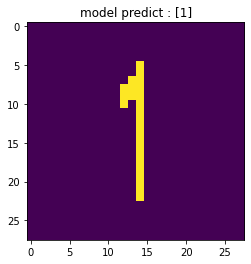

In [78]:
predict_your_image('1test.jpg')